In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn as sns

### Загрузка датасетов

In [69]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')
test = pd.read_csv('data_test.csv', index_col='Unnamed: 0')

In [70]:
train.head()

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0
2,2458816,1.0,1534107600,0.0
3,3535012,5.0,1535922000,0.0
4,1693214,1.0,1535922000,0.0


In [71]:
test.sample(2)

,id,vas_id,buy_time
59509,405490,2.0,1546808400
25992,2251140,1.0,1547413200


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  int64  
 3   target    831653 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 31.7 MB


In [73]:
# преобразуем время в дату
train['buy_time_data'] = train.buy_time.apply(lambda x: datetime.fromtimestamp(x))
test['buy_time_data'] = test.buy_time.apply(lambda x: datetime.fromtimestamp(x)).value_counts()

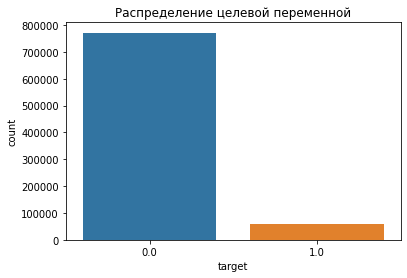

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

In [94]:
# распределение целевой переменной
sns.countplot(data=train, x='target')
plt.title('Распределение целевой переменной')
plt.show()
train.target.value_counts() / train.target.shape